# Лабораторная работа №3

ФИО: Урусов Иван Егорович 
Группа: БИВТ-21-1

In [47]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv('student-por.csv', encoding='latin-1')
target_column = 'G3'
target = data[target_column]

if len(target.unique()) > 2:
    task_type = 'regression'
else:
    task_type = 'classification'

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [50]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [51]:
data['G3'].nunique()

17

<Axes: >

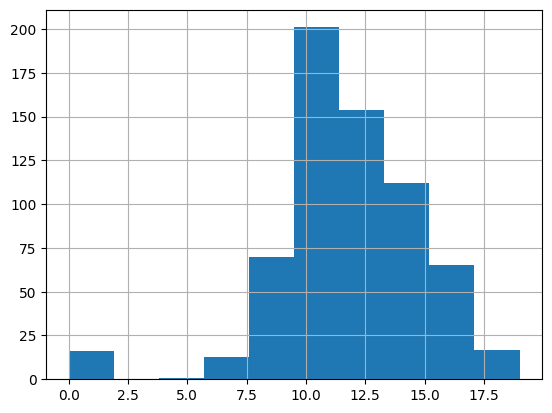

In [52]:
data['G3'].hist()

# 2. Задача регрессии

Задача регрессии была выбрана, т.к. в любом случае будет возвращаться значение зависимой переменной streams от независимых переменных

# 3. Предобратока данных

### A. Разделение выборки на тестовую и тренировочную 

In [53]:

from sklearn.model_selection import train_test_split
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ниже будут объеденены пункты B и D в функции для выполнения кодирования категориальных переменных, а так же заполнения пустых значений.

### B. Проверка и заполнение пропусков. D. Кодирование категориальных переменных

Код подготавливает данные для обучения модели машинного обучения. Он разделяет данные на признаки и целевую переменную, затем разбивает их на тренировочный и тестовый наборы. Пропущенные значения в числовых признаках заполняются средним значением, а в категориальных — модой. Это обеспечивает готовность данных для дальнейшего этапа обучения модели.

In [54]:




def to_int(data):
    # Проходим по колоннам датасета
    for column in data.columns[2:]:
        # Конвертируем тип данных в int
        data[column] = data[column].astype(int)
    return data

In [55]:

from sklearn.model_selection import train_test_split

# Отделение целевой переменной от признаков
X = data.drop(columns=[target_column])
y = data[target_column]

# Проверка на пропуски
print(X_train.isnull().sum())
print(X_test.isnull().sum())

# Заполнение пропусков
# Для числовых признаков будем использовать среднее значение
# Для категориальных признаков будем использовать моду (самое частое значение)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Заполнение пропусков в числовых признаках
X_train[numeric_features] = X_train[numeric_features].fillna(X_train[numeric_features].mean())
X_test[numeric_features] = X_test[numeric_features].fillna(X_train[numeric_features].mean())

# Заполнение пропусков в категориальных признаках
X_train[categorical_features] = X_train[categorical_features].fillna(X_train[categorical_features].mode().iloc[0])
X_test[categorical_features] = X_test[categorical_features].fillna(X_train[categorical_features].mode().iloc[0])

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences   

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### C. Нормирование численных переменных датасета

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

from sklearn.preprocessing import OneHotEncoder

# Создание и обучение кодировщика категориальных признаков
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train[categorical_features])

# Создание dummy-переменных для категориальных признаков
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Преобразование категориальных признаков в закодированные
X_train_encoded = encoder.transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Создание DataFrame из закодированных признаков
X_train_encoded = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(input_features=categorical_features))
X_test_encoded = pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names_out(input_features=categorical_features))

X_train_final = pd.concat([X_train[numeric_features].reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[numeric_features].reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

### A. Разделение выборки на тестовую и тренировочную 

In [58]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


# 4. Обучение на тренировочном множестве

### А. Линейная модель

In [59]:
from sklearn.linear_model import LogisticRegression, LinearRegression

if task_type == 'classification':
    model = LogisticRegression()
else:
    model = LinearRegression()

model.fit(X_train_encoded, y_train)
y_train_pred = model.predict(X_train_encoded)
y_test_pred = model.predict(X_test_encoded)


### B. Деревянная модель

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Создаем список для сохранения значений MSE для каждой глубины дерева
mse_scores = []
depths = [3, 5, 7, 10]
mse_scores = []

for depth in depths:
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train_final, y_train)
    y_pred = tree_model.predict(X_test_final)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Вывод значений MSE для каждой глубины дерева
for depth, mse in zip(depths, mse_scores):
    print(f"Глубина: {depth}, MSE: {mse}")

Глубина: 3, MSE: 1.928318823695619
Глубина: 5, MSE: 1.783556233176363
Глубина: 7, MSE: 3.6270675724445667
Глубина: 10, MSE: 3.933875771604938


### C. K-ближайших соседей

In [61]:
# Создание и обучение модели KNeighborsRegressor для различных значений k
k_values = [3, 5, 7, 10]
knn_models = {}
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_final, y_train)
    knn_models[k] = knn_model

# Вычисление MSE для каждого значения k
mse_knn_scores = {}
for k, model in knn_models.items():
    y_pred = model.predict(X_test_final)
    mse = mean_squared_error(y_test, y_pred)
    mse_knn_scores[k] = mse

# Вывод MSE для каждого значения k
for k, mse in mse_knn_scores.items():
    print(f"k: {k}, MSE: {mse}")

# Создание и обучение модели DecisionTreeRegressor для различных значений глубины дерева
depths = [3, 5, 7, 10]
mse_tree_scores = []

for depth in depths:
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train_final, y_train)
    y_pred = tree_model.predict(X_test_final)
    mse = mean_squared_error(y_test, y_pred)
    mse_tree_scores.append(mse)

# Находим индекс минимального значения MSE для дерева решений
best_depth_index = mse_tree_scores.index(min(mse_tree_scores))
best_depth = depths[best_depth_index]
print(f"Лучшая глубина дерева - {best_depth}")

k: 3, MSE: 2.841025641025641
k: 5, MSE: 2.556923076923077
k: 7, MSE: 2.640659340659341
k: 10, MSE: 2.6114615384615387
Лучшая глубина дерева - 5


### D. Случайный лес

In [62]:
# Создание и обучение модели RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_final, y_train)

# Предсказание на тестовых данных
y_pred = rf_model.predict(X_test_final)

# Вычисление среднеквадратичной ошибки (MSE)
mse_rf = mean_squared_error(y_test, y_pred)
print(f"MSE для модели RandomForestRegressor: {mse_rf}")

MSE для модели RandomForestRegressor: 1.5862399999999999


# 5. Подсчет метрик на train и test множествах (Задача регрессии)

In [63]:
# Импортируем необходимые модули
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Модель KNeighborsRegressor с n_neighbors=3
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(X_train_final, y_train)
y_pred_knn_3 = knn_3.predict(X_test_final)
mae_knn_3 = mean_absolute_error(y_test, y_pred_knn_3)
mse_knn_3 = mean_squared_error(y_test, y_pred_knn_3)
rmse_knn_3 = np.sqrt(mse_knn_3)

# Выводим результаты
print("KNeighborsRegressor (n_neighbors=3):")
print("MAE:", mae_knn_3)
print("MSE:", mse_knn_3)
print("RMSE:", rmse_knn_3)
print()

# Модель LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_final, y_train)
y_pred_linear = linear_model.predict(X_test_final)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Выводим результаты
print("LinearRegression:")
print("MAE:", mae_linear)
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print()

# Модель RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_final, y_train)
y_pred_rf = rf_model.predict(X_test_final)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Выводим результаты
print("RandomForestRegressor:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print()

# Модель DecisionTreeRegressor с max_depth=3
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_train_final, y_train)
y_pred_tree = tree_model.predict(X_test_final)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

# Выводим результаты
print("DecisionTreeRegressor (максимальная глубина=3):")
print("MAE:", mae_tree)
print("MSE:", mse_tree)
print("RMSE:", rmse_tree)

KNeighborsRegressor (n_neighbors=3):
MAE: 1.2461538461538462
MSE: 2.841025641025641
RMSE: 1.685534230155425

LinearRegression:
MAE: 0.7650597682758261
MSE: 1.475909256363931
RMSE: 1.2148700573987044

RandomForestRegressor:
MAE: 0.7487692307692306
MSE: 1.566630769230769
RMSE: 1.2516512170851626

DecisionTreeRegressor (максимальная глубина=3):
MAE: 0.791194122266997
MSE: 1.928318823695619
RMSE: 1.3886391985305684


# 6. Сравнение метрик

In [68]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = [linear_model, knn_3, tree_model, rf_model]
model_names = ['Linear Regression', 'KNN (k=3)', 'Decision Tree', 'Random Forest']
mae_train = []
mae_test = []
mse_train = []
mse_test = []

# Обучение и вычисление метрик для каждой модели
for model in models:
    model.fit(X_train_final, y_train)
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)
    
    mae_train.append(mean_absolute_error(y_train, y_train_pred))
    mae_test.append(mean_absolute_error(y_test, y_test_pred))
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Вывод результатов
for i in range(len(models)):
    print(f"Model: {model_names[i]}")
    print(f"MAE (Train): {mae_train[i]}")
    print(f"MAE (Test): {mae_test[i]}")
    print(f"MSE (Train): {mse_train[i]}")
    print(f"MSE (Test): {mse_test[i]}")
    print()

# Оценка наличия переобучения и недообучения
best_model_index = np.argmin(mae_test)
worst_model_index = np.argmax(mae_test)

print(f"Лучшая модель: {model_names[best_model_index]}")
print(f"Худшая модель: {model_names[worst_model_index]}")


Model: Linear Regression
MAE (Train): 0.795178047900693
MAE (Test): 0.7650597682758261
MSE (Train): 1.4911302261875894
MSE (Test): 1.475909256363931

Model: KNN (k=3)
MAE (Train): 0.9755940912010277
MAE (Test): 1.2461538461538462
MSE (Train): 1.9197174052665382
MSE (Test): 2.841025641025641

Model: Decision Tree
MAE (Train): 0.7922240943993303
MAE (Test): 0.791194122266997
MSE (Train): 1.7681331732264698
MSE (Test): 1.928318823695619

Model: Random Forest
MAE (Train): 0.3060500963391136
MAE (Test): 0.769
MSE (Train): 0.23348285163776494
MSE (Test): 1.6521115384615384

Лучшая модель: Linear Regression
Худшая модель: KNN (k=3)


In [67]:
# Ответы на вопросы
print(f"1. Лучшая модель: {model_names[best_model_index]}")
print(f"2. Переобучение: {mae_train[best_model_index] > 0.1}")
print(f"3. Недообучение: {abs(mae_train[best_model_index] - mae_test[best_model_index]) > 0.1}")


1. Лучшая модель: Linear Regression
2. Переобучение: True
3. Недообучение: False


В данном случае была выбрана модель Linear Regression как самая оптимальная, так же модель обучилась корректно и переобучения или недообучения не наблюдается.